In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/kaggle/input/amazon-fine-food-reviews/Reviews.csv')

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
print(df.keys())

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')


In [5]:
print(len(df.keys()))

10


In [6]:
df.shape

(568454, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [8]:
df.Score.value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

<AxesSubplot:>

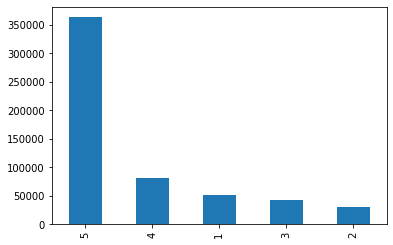

In [9]:
df.Score.value_counts().plot(kind='bar')

In [10]:
sample_of_reviews=df.sample(n=2000)

In [11]:
sample_of_reviews.shape

(2000, 10)

In [12]:
sample_of_reviews.Score.value_counts()

5    1254
4     298
1     190
3     144
2     114
Name: Score, dtype: int64

<AxesSubplot:>

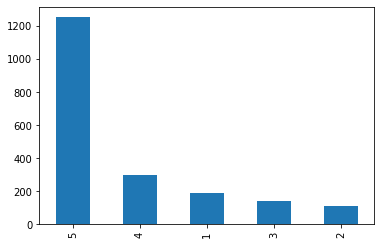

In [13]:
sample_of_reviews.Score.value_counts().plot(kind='bar')

In [14]:
fiveStardf = df[df['Score']==5]

In [15]:
fiveStardf.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...


<AxesSubplot:>

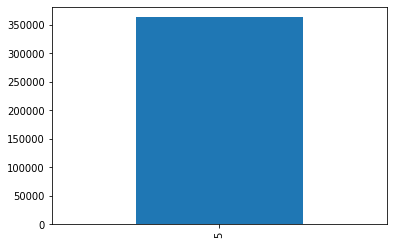

In [16]:
fiveStardf.Score.value_counts().plot(kind='bar')

In [17]:
fiveStardf.shape

(363122, 10)

In [18]:
sampfiveStardf=fiveStardf.sample(n=2000)

In [19]:
sampfiveStardf.shape

(2000, 10)

In [20]:
import spacy
nlp=spacy.load('en_core_web_sm')

In [21]:
doc=nlp(''.join(str(sampfiveStardf.Text.tolist())))

In [22]:
print(doc)

['I have long been a fan of the Tully Kona Blend coffee. I was disappointed when my local retailer quit selling Kona products!<br /><br />I actually ordered this house blend by accident, thinking that I was ordering the Kona Blend. I had more than 4 cups of coffee before I noticed on the packaging that it said House Blend instead of Kona Blend. I would not have known that it was not the Kona Blend had I not seen the packaging. One caveat: I make "lattes" by adding an equal amount of steamed milk to my coffee, so the coffee flavor is probably diluted for me.  Someone drinking it straight up may notice a difference in the flavor.<br /><br />My bottom line is that it is much less expensive than the Kona Blend, due to vendor and shipping costs, and it is more than good enough for me.  I\'ve since ordered another box.', 'I don\'t typically like banana flavored stuff. I\'m not that crazy about adding bananas in my shakes. But this banana cookie bar is FREAKIN AWESOME. It is so delicious. I s

In [23]:
doc=nlp(str(doc).replace("<br />",""))

In [24]:
doc=nlp(str(doc).replace("\\",""))

In [25]:
print(doc)

['I have long been a fan of the Tully Kona Blend coffee. I was disappointed when my local retailer quit selling Kona products!I actually ordered this house blend by accident, thinking that I was ordering the Kona Blend. I had more than 4 cups of coffee before I noticed on the packaging that it said House Blend instead of Kona Blend. I would not have known that it was not the Kona Blend had I not seen the packaging. One caveat: I make "lattes" by adding an equal amount of steamed milk to my coffee, so the coffee flavor is probably diluted for me.  Someone drinking it straight up may notice a difference in the flavor.My bottom line is that it is much less expensive than the Kona Blend, due to vendor and shipping costs, and it is more than good enough for me.  I've since ordered another box.', 'I don't typically like banana flavored stuff. I'm not that crazy about adding bananas in my shakes. But this banana cookie bar is FREAKIN AWESOME. It is so delicious. I share them with friends all 

In [26]:
from spacy.lang.en import STOP_WORDS

In [27]:
FiveStarProds=[] 
for ent in doc.ents:
    if ent.label_=='PRODUCT':
        if ent.label_ not in STOP_WORDS:
            FiveStarProds.append(str(ent))

sorted_list=sorted(FiveStarProds,key=str)

from collections import Counter
import numpy as np

new_list=np.asarray(Counter(sorted_list).most_common(20))

print(new_list)

[['Capresso' '6']
 ['Power Crunch' '4']
 ['Galileo' '2']
 ['Gatorade' '2']
 ['Whole' '2']
 ['2 Tbsp' '1']
 ['A+' '1']
 ['Butterfinger' '1']
 ['CaneCola' '1']
 ['Canola Oil, Walnuts' '1']
 ['Cavalier' '1']
 ['Chili' '1']
 ['Classic French' '1']
 ['Classic Whatchamacallit' '1']
 ['Crunch' '1']
 ['Devine' '1']
 ['EZ' '1']
 ['Folger' '1']
 ['Formula' '1']
 ['Friskies' '1']]


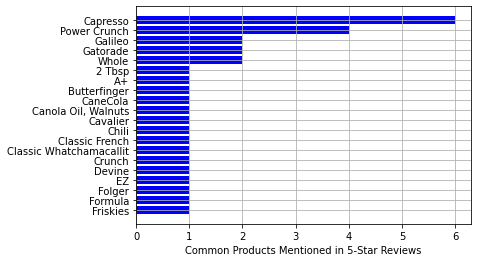

In [28]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots()
plt.barh(new_list[:,0],[int(x) for x in new_list[:,1]], color='blue',align='center')
ax.invert_yaxis()
ax.set_xlabel('Common Products Mentioned in 5-Star Reviews')
ax.grid()
plt.show()

In [29]:
FiveStarAdj=[]
for token in doc:
    if token.pos_=='ADJ':
        if ent.label_ not in STOP_WORDS:
            FiveStarAdj.append(str(token))
            
sorted_list=sorted(FiveStarAdj, key=str)

from collections import Counter
import numpy as np

new_list=np.asarray(Counter(sorted_list).most_common(20))

print(new_list)

[['good' '555']
 ['great' '541']
 ['other' '332']
 ['more' '272']
 ['little' '251']
 ['best' '241']
 ['free' '178']
 ['sweet' '170']
 ['better' '165']
 ['delicious' '163']
 ['many' '144']
 ['nice' '133']
 ['hot' '132']
 ['perfect' '125']
 ['strong' '124']
 ['favorite' '119']
 ['few' '119']
 ['first' '118']
 ['wonderful' '118']
 ['much' '116']]


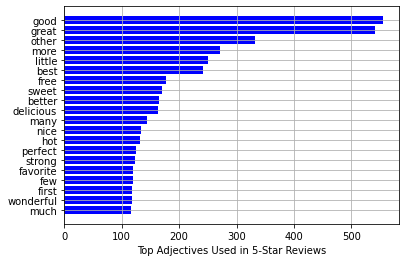

In [30]:
fig,ax=plt.subplots()
plt.barh(new_list[:,0],[int(x) for x in new_list[:,1]], color='blue',align='center')
ax.invert_yaxis()
ax.set_xlabel('Top Adjectives Used in 5-Star Reviews')
ax.grid()
plt.show()

In [31]:
#################################1 star reviews############################################

In [32]:
oneStardf = df[df['Score']==1]

In [33]:
oneStardf.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
12,13,B0009XLVG0,A327PCT23YH90,LT,1,1,1,1339545600,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plati...
26,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,1332633600,Nasty No flavor,"The candy is just red , No flavor . Just plan..."
50,51,B001EO5QW8,A108P30XVUFKXY,Roberto A,0,7,1,1203379200,Don't like it,"This oatmeal is not good. Its mushy, soft, I d..."
62,63,B001EO5TPM,A1E09XGZUR78C6,gary sturrock,2,2,1,1215302400,stale product.,Arrived in 6 days and were so stale i could no...


<AxesSubplot:>

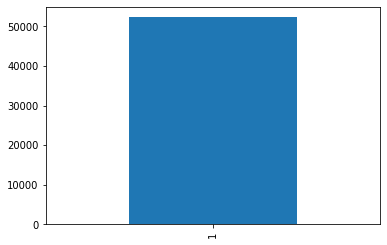

In [34]:
oneStardf.Score.value_counts().plot(kind='bar')

In [35]:
oneStardf.shape

(52268, 10)

In [36]:
oneStarsample = oneStardf.sample(n=2000)

In [37]:
doc=nlp(''.join(str(oneStarsample.Text.tolist())))

In [38]:
print(doc)

["I ordered this for my 17 year old cat. She only has one tooth and is very finicky. She will only eat the seafood pate of Friskies. I thought the purchase was a great deal since it was cheaper than Walmart and I could have it delivered to my house for a free price. I thought this was a good idea.<br />Well, I was wrong.<br />My housemate and I wondered what that godawful smell was. After weeks of dealing with cockroaches scurrying under furniture and fruit flies perching everywhere, I found out where they were breeding. One of the cans arrived banged up and maggots decided to call it home. You think fresh cat food smells bad?<br />I brought home a premature infant and was afraid of all of the germs that infested the place at the time. I did not want a single risk posed to him getting sick. So I kept him in his room until I found out where the funk was coming from.<br />The moral of this story is unless you don't mind infestation and possible contamination, don't order cat food online.

In [39]:
doc=nlp(str(doc).replace("\\",""))
doc=nlp(str(doc).replace("<br />",""))



In [40]:
print(doc)

["I ordered this for my 17 year old cat. She only has one tooth and is very finicky. She will only eat the seafood pate of Friskies. I thought the purchase was a great deal since it was cheaper than Walmart and I could have it delivered to my house for a free price. I thought this was a good idea.Well, I was wrong.My housemate and I wondered what that godawful smell was. After weeks of dealing with cockroaches scurrying under furniture and fruit flies perching everywhere, I found out where they were breeding. One of the cans arrived banged up and maggots decided to call it home. You think fresh cat food smells bad?I brought home a premature infant and was afraid of all of the germs that infested the place at the time. I did not want a single risk posed to him getting sick. So I kept him in his room until I found out where the funk was coming from.The moral of this story is unless you don't mind infestation and possible contamination, don't order cat food online.", 'I put this in an are

In [41]:
OneStarProds=[]
for ent in doc.ents:
    if ent.label_=='PRODUCT':
        if ent.label_ not in STOP_WORDS:
            OneStarProds.append(str(ent))
            
Os_sorted_list=sorted(OneStarProds,key=str)

Os_new_list=np.asarray(Counter(Os_sorted_list).most_common(22))

print(Os_new_list)

[['Science Diet' '9']
 ['4 Mars' '3']
 ['Splenda' '3']
 ['Vine' '3']
 ['Canola' '2']
 ['Citrusmint' '2']
 ['Digby' '2']
 ['Homestyle' '2']
 ['Rooibos' '2']
 ['Subscribe' '2']
 ['sugar.2' '2']
 ['&lt;Clean' '1']
 ["4oz</a>'" '1']
 ['A & E' '1']
 ['A+' '1']
 ['B000I62E6O">Oregon Fruit Blueberries' '1']
 ['BioNature' '1']
 ['Blue Mountain' '1']
 ['Bluebird' '1']
 ['Buyer Beware' '1']
 ['Camelback(tm' '1']
 ['Captain Crunch' '1']]


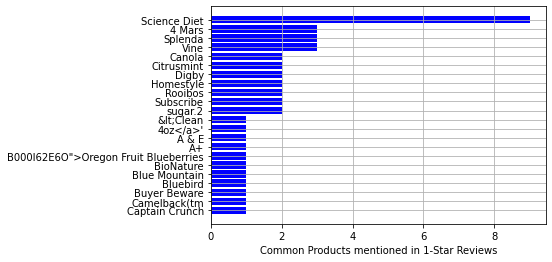

In [42]:
fig,ax=plt.subplots()
plt.barh(Os_new_list[:,0],[int(x) for x in Os_new_list[:,1]],color='blue',align='center')
ax.invert_yaxis()
ax.set_xlabel('Common Products mentioned in 1-Star Reviews')
ax.grid()

plt.show()

In [43]:
OneStarAdj=[]
for token in doc:
    if token.pos_=='ADJ':
        if ent.label_ not in STOP_WORDS:
            OneStarAdj.append(str(token))
            
OneStarSorted_List=sorted(OneStarAdj,key=str)

OneStar_new_adj_list=np.asarray(Counter(OneStarSorted_List).most_common(20))

print(OneStar_new_adj_list)

[['good' '411']
 ['other' '374']
 ['bad' '269']
 ['more' '240']
 ['first' '204']
 ['same' '203']
 ['little' '193']
 ['great' '171']
 ['old' '155']
 ['different' '152']
 ['real' '140']
 ['few' '138']
 ['sure' '133']
 ['better' '131']
 ['free' '126']
 ['many' '124']
 ['disappointed' '123']
 ['new' '120']
 ['sweet' '118']
 ['much' '116']]


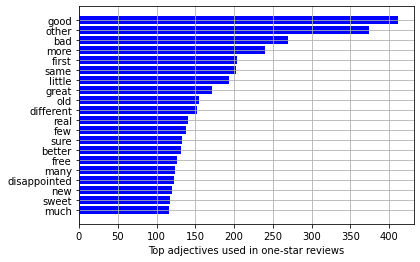

In [44]:
fig,ax=plt.subplots()
plt.barh(OneStar_new_adj_list[:,0],[int(x) for x in OneStar_new_adj_list[:,1]],color='blue',align='center')
ax.invert_yaxis()
ax.set_xlabel('Top adjectives used in one-star reviews')
ax.grid()

plt.show()